### Music genere classifier playground
The idea behind this classifier is to use image recognition models to detect various features
of different music generes.

In [2]:
# This cell imports fastbook and sets it up.
# PYTORCH_ENABLE_MPS_FALLBACK env variable is set to tell PyTorch
# that it should train models using CPU instead of GPU.
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display

In [4]:
# check an arbitrary file
sample_path = "dataset/Data/genres_original/rock/rock.00000.wav"
display.Audio(filename=sample_path)

y: [-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963  0.1296997 ]

y shape: (661794,)

Sample rate (KHz): 22050

Length of audio: 30.013333333333332


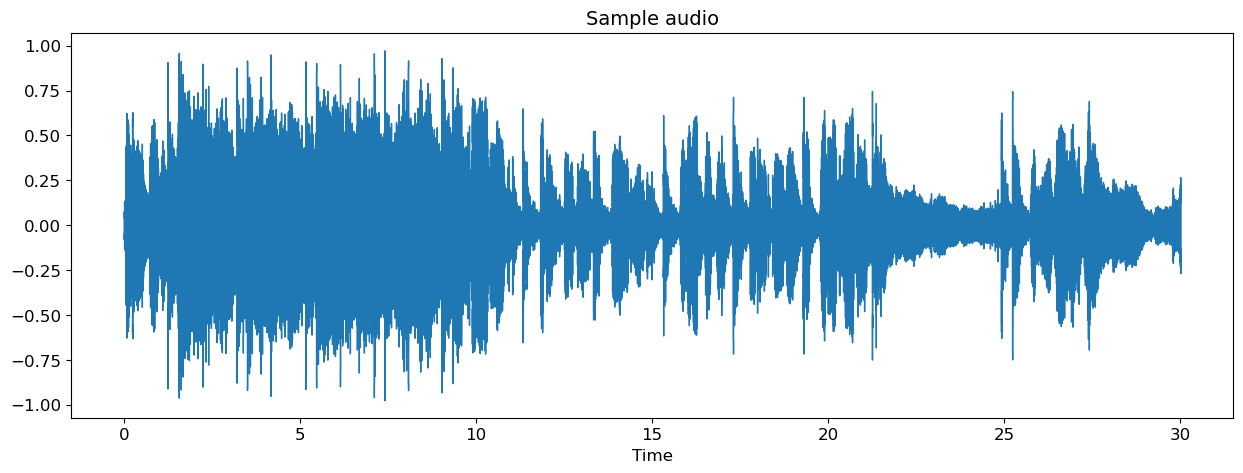

In [11]:
# display a soundwave using librosa
y, sample_rate = librosa.load(sample_path)

print(f'y: {y}\n')
print(f'y shape: {np.shape(y)}\n')
print(f'Sample rate (KHz): {sample_rate}\n')
print(f'Length of audio: {np.shape(y)[0] / sample_rate}')

# plot
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y, sr=sample_rate)
plt.title("Sample audio", fontsize=14)
plt.show()

Shape of transformed signal object: (1025, 330898)


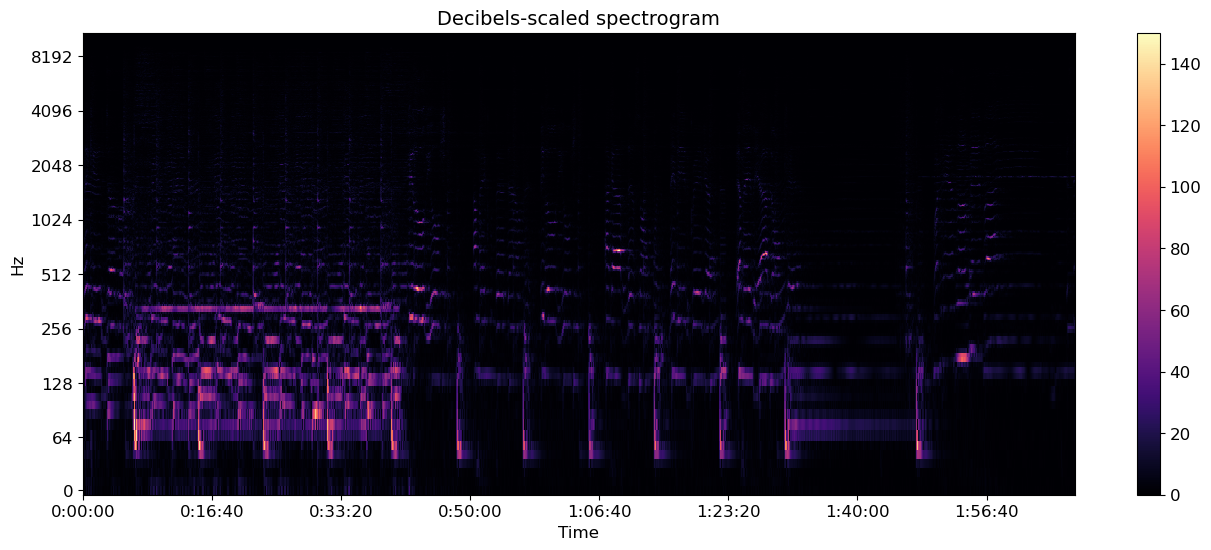

In [7]:
# create a spectrogram from a soundwave
# for this Short Time Fourier transformation can be used (STFT)
transformed_signal = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print('Shape of transformed signal object:', np.shape(transformed_signal))

# convert amplitude spectrogram to Decibels-scaled spectrogram.
librosa.amplitude_to_db(transformed_signal, ref = np.max)

# create a spectogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(transformed_signal, sr=sample_rate, hop_length=512, x_axis='time', y_axis='log')

# display
plt.colorbar()
plt.title("Decibels-scaled spectrogram", fontsize=14)
plt.show()

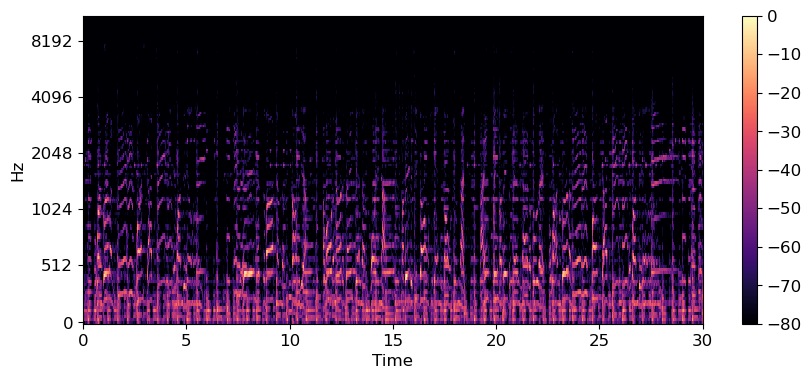

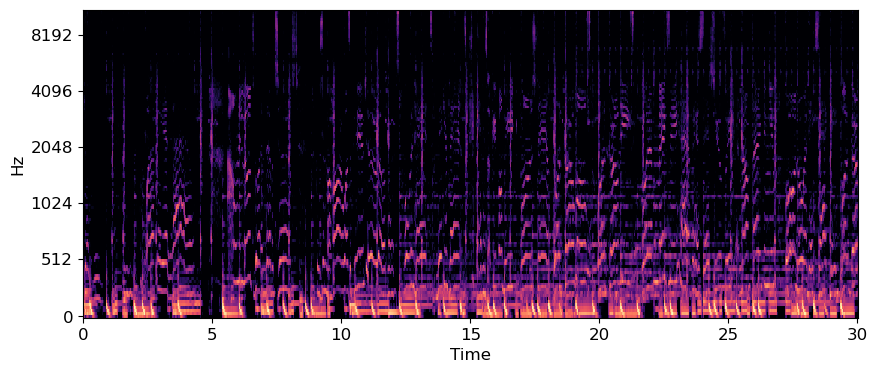

In [156]:
# create Mel diagram from an audio
sample_path_1 = "genres/blues/blues.00000.wav"
sample_path_2 = "genres/pop/pop.00050.wav"

display.Audio(filename=sample_path_1)
display.Audio(filename=sample_path_2)

y1, sample_rate_1 = librosa.load(sample_path_1)
spectrogram1 = librosa.feature.melspectrogram(y=y1, sr=sample_rate_1, n_mels=128, n_fft=2048, hop_length=512)
spectrogram_db_1 = librosa.amplitude_to_db(spectrogram1, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db_1, sr=sample_rate_1, x_axis='time', y_axis='mel', hop_length=512)
plt.colorbar()
plt.show()


y2, sample_rate_2 = librosa.load(sample_path_2)
spectrogram2 = librosa.feature.melspectrogram(y=y2, sr=sample_rate_2, n_mels=128, n_fft=2048, hop_length=512)
spectrogram_db_2 = librosa.amplitude_to_db(spectrogram2, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db_2, sr=sample_rate, x_axis='time', y_axis='mel', hop_length=512)
plt.show()


In [50]:
# Python OS module playground
root_dir = "images"
list_dir = os.listdir("genres")
print(list_dir)

# test sample,
filename = os.listdir("genres/pop")[:10][0][:-4]
filename

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


'pop.00027'

In [114]:
def create_mel_spectrogram(path, n_mels=512, n_fft=2048, hop_length=512):
    try:
        y, sample_rate = librosa.load(path)
        # create Mel diagram from an audio
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)
        # amplitude to dezibel conversion
        spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
        return spectrogram_db
    except Exception as e:
        return None
    

# This function converts an original dataset with audio samples
# to images (Mel spectrograms).
# IMPORTANT: this function expects the same file structure, 
# meaning that every genre has its own folder
def convert_to_mel(source: str, dest: str) -> None:
    genres = os.listdir(source)
    files_processed = 0
    broken_files = 0
    
    for genre in genres:
        src_folder = source + "/" + genre
        dest_folder = dest + "/" + genre
        total_files = len(os.listdir(src_folder))
        files_processed += total_files
        
        print(f'processing src:{src_folder} | dest:{dest_folder} | total files:{total_files}')
        
        os.makedirs(dest_folder)
        for filename_with_ext in os.listdir(src_folder):
            # truncate the last 4 symbols e.g .xxx (.wav)
            src_path = src_folder + "/" + filename_with_ext
            dest_path = dest_folder + "/" + filename_with_ext[:-4] + ".png"

            # print(f'converting {src_path} into {dest_path} ...')
            
            mel_spectrogram_db = create_mel_spectrogram(src_path)
            if mel_spectrogram_db is None:
                broken_files += 1
                continue
            
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(spectrogram_db, sr=sample_rate, hop_length=512)
            plt.tight_layout()
            plt.savefig(dest_path, bbox_inches='tight', pad_inches=0)
            plt.close()

            # print(f'successfuly converted {src_path} into {dest_path}!!!')

    print(f"Data processing finished, processed {files_processed} files, broken {broken_files}")
            

processing src:genres/pop | dest:images/pop | total files:100
processing src:genres/metal | dest:images/metal | total files:100
processing src:genres/disco | dest:images/disco | total files:100
processing src:genres/blues | dest:images/blues | total files:100


KeyboardInterrupt: 

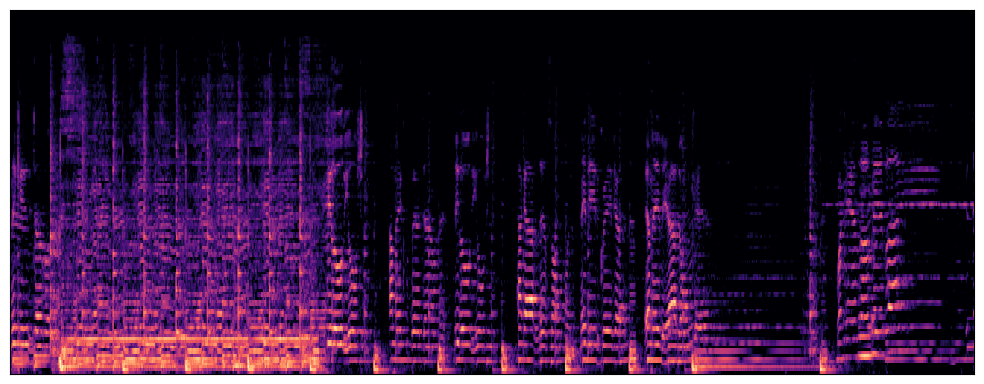

In [115]:
# Please comment this if you don't want to transform audio data to Mel spectrograms
source_dir = "genres"
dest_dir = "images"
convert_to_mel(source_dir, dest_dir)

In [101]:
sample_path = "genres/jazz/jazz.00054.wav"
display.Audio(filename=sample_path)

In [116]:
path = "images_original"
fns = get_image_files(path)
failed = verify_images(fns)
print(f"fns: {len(fns)} | failed: {len(failed)}")

fns: 999 | failed: 0


In [133]:
genres = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))
dls = genres.dataloaders(path)

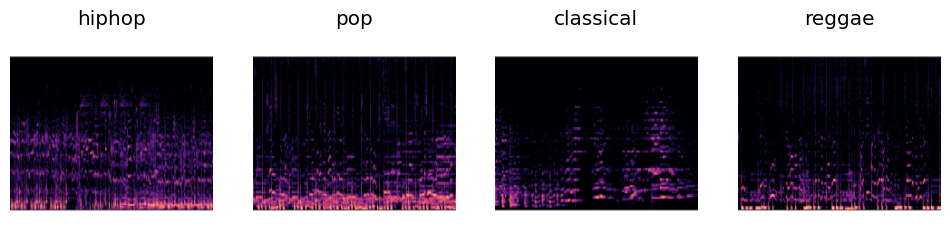

In [134]:
dls.valid.show_batch(max_n=4, nrows=1)

In [136]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(20)

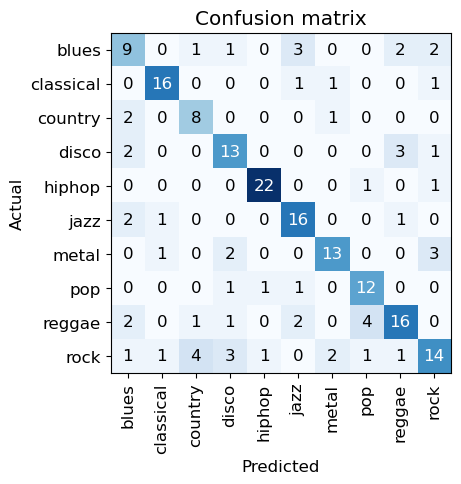

In [137]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [138]:
learn.export()

### Test

In [153]:
learner = load_learner('export.pkl')
labels = learner.dls.vocab

In [184]:
def audio_to_mel_spectrogram(audio):
    y, sr = librosa.load(audio)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    # buf = BytesIO()

    # plt.figure(figsize=(10, 4))
    plt.figure(figsize=(2.24, 2.24), dpi=100)
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512)
    plt.tight_layout()
    # plt.savefig(buf, format='png')
    plt.savefig('./test.png', bbox_inches='tight', pad_inches=0)
    # buf.seek(0)
    return 'test.png'
    # return Image.open(buf).resize((224, 224))

def process(audio):
    spectrogram = audio_to_mel_spectrogram(audio)
    pred, pred_idx, probs = learner.predict(spectrogram)
    print(f'Prediction: {pred}, Probability: {probs[pred_idx]}')
    return dict(zip(labels, map(float, probs)))

Prediction: jazz, Probability: 0.9987879395484924


{'blues': 2.4025811740102654e-07,
 'classical': 0.00032882404047995806,
 'country': 0.0001617671368876472,
 'disco': 3.0774583592574345e-07,
 'hiphop': 4.855619977206516e-07,
 'jazz': 0.9987879395484924,
 'metal': 6.631411224589101e-07,
 'pop': 0.00020931666949763894,
 'reggae': 0.0005103735020384192,
 'rock': 7.670210067090011e-08}

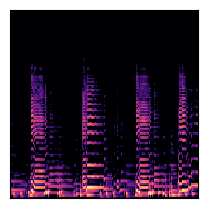

In [185]:
test_path = "genres/jazz/jazz.00010.wav"
process(test_path)

In [177]:
learner.predict("images_original/jazz/jazz00000.png")

('classical',
 tensor(1),
 tensor([6.7193e-06, 8.8644e-01, 1.3154e-05, 1.4881e-05, 3.2154e-05, 1.1216e-01, 2.8413e-05, 1.8864e-04, 1.1031e-03, 1.0504e-05]))